# Text Processing and Naive Bayes

## SMS Spam Collection Data Set

Dataset at: https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection

In [13]:
import pandas as pd

filename = "~/Desktop/Esercizi_università/Data_Web_Mining/Dati/SMSSpamCollection"
data = pd.read_csv(filename, delimiter='\t', header=None,
                    names = ['label', 'text'])

In [14]:
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
data.loc[0,'text']

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [16]:
data.loc[2,'text']

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [17]:
data['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], random_state=0)

### Baseline Classifier

In [19]:
baseline_acc = y_test.value_counts()[0] / len(y_test)
print ( f"Baseline Accuracy: {baseline_acc*100:.2f}%" )

Baseline Accuracy: 86.72%


In [20]:
baseline_pred = y_train.value_counts().index[0]
baseline_acc=sum( baseline_pred==y_test )/len(y_test)
print ( f"Baseline Accuracy: {baseline_acc*100:.2f}%" )

Baseline Accuracy: 86.72%


## How to build a classifier?

## Feature Processing

## Option 1: a text is a **set of words**

In [21]:
X_train_words = X_train.apply(lambda x: set(x.split()))

In [22]:
X_train_words.head()

872     {good...no, understand, going, experience, pro...
831     {So, opt, have, special., R, recd., STOP., 078...
1273                                              {Ok...}
3314    {take, Anyway,, if, have, choice, confused...,...
4929    {up, too, wasn‘t, Just, gone, pissed, and, his...
Name: text, dtype: object

In [23]:
X_train_words = X_train.apply(lambda x: set(x.lower().split()))

In [24]:
X_train_words.head()

872     {good...no, understand, going, experience, pro...
831     {opt, u, stop., cust, so, have, call, to, spec...
1273                                              {ok...}
3314    {anyway,, take, if, have, choice, confused...,...
4929    {up, too, wasn‘t, gone, pissed, and, his, some...
Name: text, dtype: object

In [25]:
# union of all terms
lexicon = set.union( *X_train_words ) # * unpack iterable into arguments

print ( len( lexicon ) ) # This would make a large matrix !
# print ( lexicon )

11439


In [26]:
from sklearn.feature_extraction.text import CountVectorizer

vctz = CountVectorizer(binary=True)

X_train = vctz.fit_transform(X_train)

print (X_train.shape)

# print (vctz.vocabulary_)

(4179, 7546)


In [27]:
print ( X_train[0,:] ) # X is in sparse Format

  (0, 3676)	1
  (0, 3090)	1
  (0, 3100)	1
  (0, 4663)	1
  (0, 5294)	1
  (0, 1526)	1
  (0, 6315)	1
  (0, 4593)	1
  (0, 4049)	1
  (0, 2630)	1
  (0, 6764)	1
  (0, 6964)	1
  (0, 915)	1
  (0, 2058)	1
  (0, 7133)	1


In [28]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train,y_train)

model_acc = accuracy_score ( y_true = y_test,
     y_pred = model.predict( vctz.transform(X_test) ))
print ( f"Baseline Accuracy: {model_acc*100:.2f}%" )

Baseline Accuracy: 97.06%


## Option 2: a text is a **bag of words**

In [29]:
# get data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], random_state=0)

# create the vectorier
from sklearn.feature_extraction.text import CountVectorizer
vctz = CountVectorizer(binary=False)
X_train = vctz.fit_transform(X_train)

In [30]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train,y_train)

model_acc = accuracy_score ( y_true = y_test,
     y_pred = model.predict( vctz.transform(X_test) ))
print ( f"Baseline Accuracy: {model_acc*100:.2f}%" )

Baseline Accuracy: 96.98%


## Option 3: TF-IDF

### Term frequency

The term frequency used above is simply the number of times a term occurs in a document $tf(t)$.


### Inverse document frequency

Inverse document frequency approximates the specificity of a term in a given document collection.
IDF is defined as follows:

$$
idf(t) = \ln \frac{N_{docs}}{df(t)}
$$

where $N_{docs}$ is the number of documents in the collection and ${df(t)}$ is the number of documents containing the term $t$.

IDF is used to discount frequent terms.

The weight of a term for a document is thus defined as $tf(t)\cdot idf(t)$.

In [31]:
# get data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], random_state=0)

# create the vectorier
from sklearn.feature_extraction.text import TfidfVectorizer
vctz = TfidfVectorizer()
X_train = vctz.fit_transform(X_train)

In [32]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train,y_train)

model_acc = accuracy_score ( y_true = y_test,
     y_pred = model.predict( vctz.transform(X_test) ))
print ( f"Model Accuracy: {model_acc*100:.2f}%" )

Model Accuracy: 96.84%


## More Text Processing

Typical "text normalization" steps are:

 - **Stemming** refers to the removal of prefix/suffixes: `being` -> `be`, `was`->`was` 

 - **Lemming** refers to the identification of the "origin" of a word: `being` -> `be`, `was`->`be`


In [33]:
import spacy

# create a spaCy tokenizer
nlp = spacy.load('en_core_web_sm')

In [34]:
doc = nlp("I love playing tennis")
for token in doc:
    print (f"token:{token}  -> lemma:{token.lemma_}")

token:I  -> lemma:I
token:love  -> lemma:love
token:playing  -> lemma:play
token:tennis  -> lemma:tennis


In [35]:
import spacy
nlp = spacy.load('en_core_web_sm')

def my_tokenizer(x):
    doc = nlp(x)
    return([token.lemma_ for token in doc])

# get data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], random_state=0)

# create the vectorier
from sklearn.feature_extraction.text import TfidfVectorizer
vctz = TfidfVectorizer(tokenizer=my_tokenizer)
X_train = vctz.fit_transform(X_train)

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train,y_train)

model_acc = accuracy_score ( y_true = y_test,
     y_pred = model.predict( vctz.transform(X_test) ))
print ( f"Model Accuracy: {model_acc*100:.2f}%" )

Model Accuracy: 96.84%


See more about Spacy: https://spacy.io/usage/linguistic-features

# Naive Bayes

#### Example

You want to go running today, but the morning is cloudy. You know that:

 - 50% of all rainy days start off cloudy
 - 40% of days start cloudy
 - This is typically a dry month, only 10% of the days are rainy

**What is the chance of rain?**

Or... what is $P(Rain|Cloudy)$ ?


We recall that:

$$P(Y|X) = \frac{P(X,Y)}{P(X)}$$

which implies:

$$P(X,Y) = P(Y|X)P(X) \quad\quad\quad P(X,Y) = P(X|Y)P(Y)$$

From the last two equations, we can derive the Bayes Theorem:

$$P(Y|X) = \frac{P(X|Y)P(Y)}{P(X)}$$


In our example:

$$P(Rain|Cloudy) = \frac{P(Cloudy|Rain)P(Rain)}{P(Cloudy)}$$

$$P(Rain|Cloudy) = \frac{0.50 \cdot 0.10}{ 0.40 } = 12.5\% $$

... well, lower than I expected!


In a Machine Learning scenario, the question becomes:

 - what is $P(y|X)$ ?

Or, in presence of multiple classes $C_1, \ldots, C_m$, what is 

$$\arg \max_{C_i} P(C_i |X)$$


In order to make this computation feasible , we assume features are conditionally independent of one another:

$$
 P(C_i |X) = P(x_1 | C_i) \cdot P(x_2 | C_i) \cdot \ldots P(x_f | C_i)
$$

and therefore the prediction of our model is:

$$\arg \max_{C_i} P(C_i |X) = P(x_1 | C_i) \cdot P(x_2 | C_i) \cdot \ldots P(x_f | C_i) \frac{P(C_i)}{P(X)}
$$

Note that $P(X)$ does not change the ranking of the different classes $C_i$, and therefore it can be removed for classification purposes.

- Nicely enough, $P(x_j|C_i)$ can be pre-computed from the dataset
  - **Multinomial Naive Byes**: if feature $f_j$ is **categorical** then $P(x_j|C_i)$ is the number of instances in the dataset of class $C_i$ whose $j$-the features has the same values as $X$, divided by the cardinality of $C_i$.
  - **Gaussian Naive Byes**: if feature $f_j$ is **numerical** then we assume the feature has Gaussian distribution and, after computing mean $\mu$ and standard deviation $\sigma$ from the dataset, we have:
  $$
  P(x_j|C_i) = \frac{1}{\sqrt{2\pi}\sigma} e^{-\frac{(x_j-\mu)^2}{2\sigma^2}}
  $$


- Bayesian classifiers are statistical classifiers. They can predict class membership probabilities such as the probability that a given tuple belongs to a particular class.

- Naive Bayesian classifiers assume that the effect of an attribute value on a given class is independent of the values of the other attributes.

In [37]:
# get data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], random_state=0)

# create the vectorizer
from sklearn.feature_extraction.text import CountVectorizer
vctz = CountVectorizer(binary=False)
X_train = vctz.fit_transform(X_train)

In [38]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train.toarray(),y_train)

model_acc = accuracy_score ( y_true = y_test,
     y_pred = model.predict( vctz.transform(X_test).toarray() ))
print ( f"Model Accuracy: {model_acc*100:.2f}%" )

Model Accuracy: 98.85%


## What if we have $P(x_j|C_i)$ = 0?


- The whole product goes to zero, even if signals from other features were very strong.

- **Laplace Correction**: Pretend we observe one additional instance for feature value.
$$
P(x_j|C_i) = \frac{N_{ij}+1}{N_i + v}
$$ 

where $v$ is the total number of unique values in $D$. There are other variants.

## What if we have missing values?

- At training time skip instance

- At test time assume $P(x_j|C_i)$ is the same for each $C_i$, skip features

## Computational Complexity?

- Obviously fast
- Common practice: avoid numerical issues (e.g., underflow) by computing the log:
$$
 \log P(C_i |X) = \log(P(x_1 | C_i)) + \log( P(x_2 | C_i)) \cdot \ldots \log(P(x_f | C_f))
$$

## Remarks
- parameters can be estimated with a small amount of data
- Robust to isolated noise points
- Handle missing values 
- Robust to irrelevant attributes
  - they do not impact much on estimating the model parameters
- Independence assumption may not hold for some attributes
- extremely fast for both training and prediction
- provide straightforward probabilistic prediction
- easily interpretable
- few tunable parameters

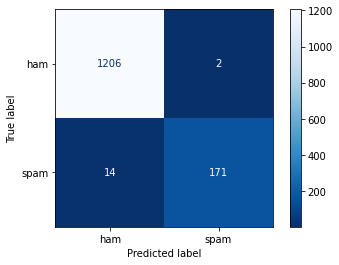

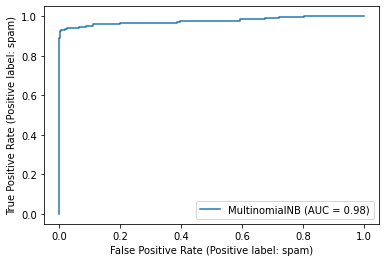

In [39]:
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(
    estimator=model,
    X=vctz.transform (X_test), y=y_test, 
    cmap = 'Blues_r');



RocCurveDisplay.from_estimator(
    estimator=model,
    X=vctz.transform (X_test), y=y_test);

In [40]:
from sklearn.metrics import roc_auc_score

auroc = roc_auc_score( y_true  = y_test, 
                       y_score = model.predict_proba(vctz.transform(X_test))[:,1])

print (f"AUROC: {auroc:.3f}")

AUROC: 0.977


### Additional insight: Detection error tradeoff (DET) curve

Illustrates the trade-off between False Positives and False Negatives in normal deviate scale.

**False Positive Rate**: $\frac{\text{\# False Positives}}{\text{\# Total Negatives}}$

**False Negative Rate**: $\frac{\text{\# False Negatives}}{\text{\# Total Positives}}$

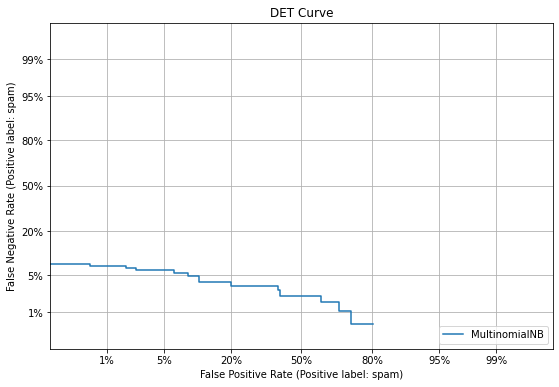

In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import DetCurveDisplay

fig, ax = plt.subplots(figsize=(9, 6))

DetCurveDisplay.from_estimator(
    estimator=model,
    X=vctz.transform (X_test), y=y_test,
    ax=ax);

ax.set_title('DET Curve')
ax.grid()